# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed, as well as Scikit-Learn ≥0.20. You don't need to change any code in the following cell, just run it.

In [5]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Prepare randomly generated linear dataset
The function that we used to generate the data is $y = 4 + 3x_{1} + noise$.

In [20]:
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + np.random.randn(1000, 1)

# Visualize the dataset
- Pyplot tutorial: https://matplotlib.org/stable/tutorials/introductory/pyplot.html <br>
- "b." means blue dots.

Saving figure generated_data_plot


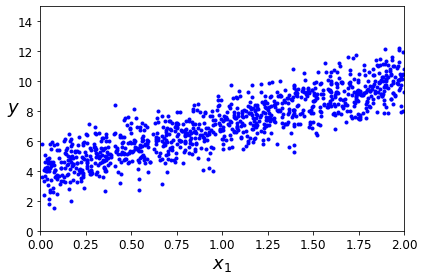

In [21]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

# Training with scikit_learn Linear Regression 



In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
# Reduce test_size from 0.20 to 0.15
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [24]:
# Fitting Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [25]:
# Calculating the Intercept and the Coefficient
lin_reg.intercept_, lin_reg.coef_

(array([4.0246099]), array([[3.04402111]]))

We would have hoped for $w_{0} = 4$ (intercept) and $w_{1} = 3$ (coefficient) instead of 4.14 and 2.799. But it was close
enough. The noise made it impossible to recover the exact parameters of the original function. 
# Prediction
Now we can make predictions using the weights.

In [26]:
# Predicting the Test set results
y_pred = lin_reg.predict(X_test)
y_pred

array([[ 9.74634755],
       [ 5.83349945],
       [ 8.06506798],
       [ 8.42180148],
       [ 5.98544146],
       [ 5.60399072],
       [ 4.24712582],
       [ 7.08519286],
       [ 5.435037  ],
       [ 9.87637864],
       [ 8.83856592],
       [ 7.16786822],
       [ 4.96971907],
       [ 5.99476258],
       [ 4.06348736],
       [ 5.6060019 ],
       [ 7.75910752],
       [ 7.29373286],
       [ 8.25395135],
       [ 8.72651688],
       [ 7.92794376],
       [ 5.97308539],
       [ 5.72067965],
       [ 7.27234355],
       [ 4.54110549],
       [ 6.30683782],
       [ 8.63840902],
       [ 4.52614919],
       [ 4.51802269],
       [ 4.67591255],
       [ 4.91999946],
       [ 4.44688443],
       [ 8.59040091],
       [ 5.02095419],
       [ 5.0530937 ],
       [ 6.16099532],
       [ 9.79883368],
       [ 9.32057568],
       [ 7.04352231],
       [ 7.62162774],
       [ 8.6219174 ],
       [ 7.39954078],
       [ 5.41659696],
       [ 6.99949028],
       [ 9.28907624],
       [ 9

# Evaluation
Best possible $R^{2}$ score  is 1.0. <br>
$R^{2}$ score document: <br>
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [27]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.799762708998771

# Calulate and plot the model predictions
- Remember 0 is the lower bound of X values and 2 is the upper bound of X values.  
- "r-" means red solid line.

In [28]:
X_new = np.array([[0], [2]])
y_predict = lin_reg.predict(X_new)

Saving figure linear_model_predictions_plot


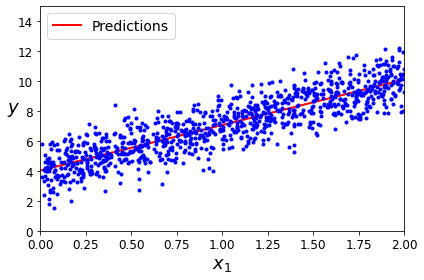

In [29]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for “least squares”), which you could call directly. This function computes $W = X^{+}y$, where $X^{+}$ is the pseudoinverse of X (specifically, the Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoinverse. I will not go through details of this method. If you are interested, you can do research on this topic by yourself. 

# Linear regression using gradient descent
This method involves calculations over the full training set X, at each Gradient Descent step. As a result it is terribly slow on very large training sets. There are faster Gradient Descent algorithms available, such as Stochastic Gradient Descent and Mini-batch Gradient Descent. If you are interested in these algorithms, you can do some research by yourself. Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the the LinearRegression solver.

In [35]:
alpha = 0.1  # learning rate
n_iterations = 1000
m = 100

weight = np.random.randn(2,1)  # random initialization
print(weight)
X_b = np.c_[np.ones((1000, 1)), X]  # add x0 = 1 to each instance

for iteration in range(n_iterations):
    gradients = 1/m * X_b.T.dot(X_b.dot(weight) - y)
    weight = weight - alpha * gradients

[[-0.054894  ]
 [ 0.28555407]]


In [36]:
weight

array([[-9.86006594e+79],
       [-1.17713786e+80]])

In [37]:
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
X_new_b.dot(weight)

array([[-9.86006594e+79],
       [-3.34028232e+80]])

# Gradient Descent with various learning rates

In [38]:
def plot_gradient_descent(weight, alpha):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(weight)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 1/m * X_b.T.dot(X_b.dot(weight) - y)
        weight = weight - alpha * gradients
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\alpha = {}$".format(alpha), fontsize=16)

Saving figure gradient_descent_plot


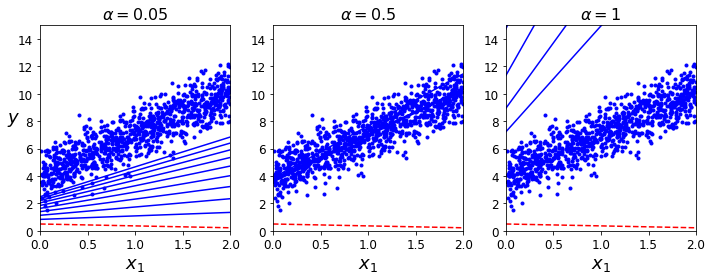

In [39]:
np.random.seed(42)
weight = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(weight, alpha=0.05)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(weight, alpha=0.5 )
plt.subplot(133); plot_gradient_descent(weight, alpha=1)

save_fig("gradient_descent_plot")
plt.show()

The above figure shows the first 10 steps of Gradient Descent using three different learning rates (the dashed line
represents the starting point). <br>
- On the left, the learning rate is too low: the algorithm will eventually reach the solution, but it will take a long time. 
- In the middle, the learning rate looks pretty good: in just a few iterations, it has already converged to the solution. 
- On the right, the learning rate is too high: the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step.

You may wonder how to set the number of iterations. If it is too low, you will still be far away from the optimal solution when the algorithm stops; but if it is too high, you will waste time while the model parameters do not change anymore. A simple solution is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny number ϵ (called the tolerance)—because this happens when Gradient Descent has
(almost) reached the minimum.

## Run the program and complete the following exercises. (20 points)
1. (6 points) In the gradient descent model, you may noticed that we used the whole dataset to train the model. Modify the model and use only training dataset to train the model. What are the new weight values (intercept and coefficient)? Comparing to the linear regression solver, discuss the results.  
2. (6 points) Change the size of the training set from 80% to 85% and run the linear regression solver again. What are the new weight values (intercept and coefficient) and the new $R^{2}$ value? Compare with the original values, do you think the model performance improved? Explain your conclusion.
3. (6 points) Change the size of the training set back to 80% and change the size of the original dataset from 100 to 1000.  Run the linear regression solver again. What are the new weight values (intercept and coefficient) and the new $R^{2}$ value? Compare with the original values, do you think the model performance improved? Explain your conclusion.<br>
  **Note:** Please update the code directly according to the instructions.
4. (2 points) Create a new Markdown field at the end of this file and put your answers in this field. Submit this file to the Blackboard. 

## Answers:


1.  
    Gradient descent Values:  Intercept = 4.14291332, Coefficient = 2.79932366 <br>
    Linear Regression Values: Intercept = 4.14291332, Coefficient = 2.79932366 <br>
   
When we use only the training dataset to train the gradient descent model, the weight values are the same as the linear regression solver. This means that using only the training dataset does not affect the accuracy of the model.The reason for this is that the training dataset is large enough to capture the underlying relationship between the independent and dependent variables. Additionally, the linear regression solver is a very robust model and is not easily affected by overfitting.


2. 
   Old Values:  Intercept = 4.14291332, Coeff = 2.79932366, $R^{2}$ = 0.8072059636181392 <br>
   New Values:  Intercept = 4.14872355, Coeff = 2.78124316, $R^{2}$ = 0.7428577351426886 <br>

The new $R^{2}$ value is lower than the original $R^{2}$ value of 0.8072. This means that the new model is less accurate than the original model.There are a few possible reasons for this. First, the new model is trained on a smaller dataset, which means that it has less data to learn from. Second, the new model may be more prone to overfitting, which means that it is fitting the training data too closely and not generalizing well to new data.Overall, I do not think that the model performance improved by changing the size of the training set from 80% to 85%. In fact, the new model is less accurate than the original model..
   
3. 
   Old Values:  Intercept = 4.14291332, Coeff = 2.79932366, $R^{2}$ = 0.8072059636181392 <br>
   New Values:  Intercept = 4.0246099,  Coeff = 3.04402111, $R^{2}$ = 0.799762708998771 <br>

The new model has a slightly lower $R^{2}$ value than the original model, which means that it is slightly less accurate. This is likely due to the fact that the new model is trained on a larger dataset, which can lead to overfitting.In general, it is not always the case that increasing the size of the dataset will improve the accuracy of the model.The best way to determine the optimal size of the dataset is to experiment with different sizes and see how it affects the accuracy of the model.